In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
number_of_datapoints = 1000
# generate random x values in the range -5 to +5
x = np.random.uniform(low = -5 , high = 5 , size = (number_of_datapoints, 1))
# generate random y values in the range -5 to +5
y = np.random.uniform(-5 , 5 , size = (number_of_datapoints , 1))
# generate some random error in the range -1 to +1
noise = np.random.uniform(low =-1 , high =1, size = (number_of_datapoints, 1))
z = 7 * x + 6 * y + 5 + noise

In [3]:
input = np.column_stack((x,y))

In [4]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])

In [5]:
model.compile(optimizer = 'sgd' , loss = 'mean_squared_error' , metrics = ['mse'] )

In [6]:
from tensorflow.keras.callbacks import History 
history = History()

In [7]:
model.fit(
    input,
    z,
    epochs = 15,
    verbose = 1,
    validation_split = 0.2,
    callbacks = [history]
)

Epoch 1/15
25/25 [==============================] - 1s 9ms/step - loss: 115.0061 - mse: 115.0061 - val_loss: 9.4997 - val_mse: 9.4997
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 6.0803 - mse: 6.0803 - val_loss: 3.7080 - val_mse: 3.7080
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 2.4203 - mse: 2.4203 - val_loss: 1.6095 - val_mse: 1.6095
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0985 - mse: 1.0985 - val_loss: 0.8389 - val_mse: 0.8389
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6171 - mse: 0.6171 - val_loss: 0.5357 - val_mse: 0.5357
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4387 - mse: 0.4387 - val_loss: 0.4278 - val_mse: 0.4278
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3736 - mse: 0.3736 - val_loss: 0.3883 - val_mse: 0.3883
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3492 - mse: 

In [8]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


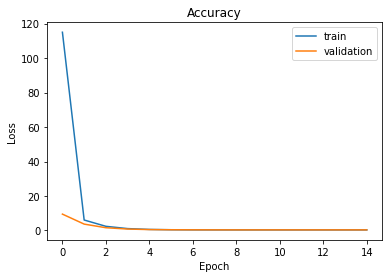

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

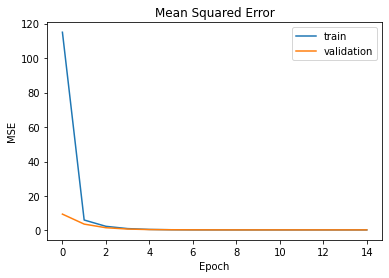

In [15]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Mean Squared Error")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

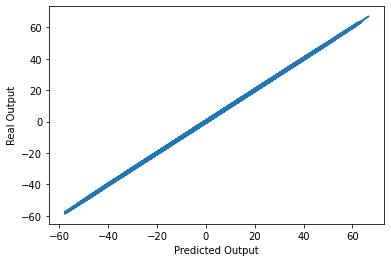

In [22]:
plt.plot(np.squeeze(model.predict_on_batch(input)),
         np.squeeze(z))
plt.xlabel("Predicted Output")
plt.ylabel("Real Output")
plt.show()

In [23]:
print("Predicted z for x=2, y=3 ---> ", model.predict([[2,3]]).round(2))

Predicted z for x=2, y=3 --->  [[36.96]]


In [24]:
print("Expected output: ", 7*2 + 6*3 + 5)

Expected output:  37
